In [2]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import date
import datetime
from pathlib import Path
import seaborn as sns

In [3]:
caminho = r'Z:\Banco SIVEP Exportação'
lista_arquivos = os.listdir(caminho)
lista_datas = []

for arquivo in lista_arquivos:
    #Descobrir a data desse arquivo
    data = os.path.getmtime(f'{caminho}/{arquivo}')
    lista_datas.append((data,arquivo))

lista_datas.sort(reverse=True) #Vai ordenar a lista em ordem decrescente com reverse=True Obs: Ele ordena sempre com o primeiro valor, por isso colocamos data antes de arquivo
ultimo_arquivo = lista_datas[0][1] #Pega o ultimo arquivo
ultimo_arquivo

'Banco SIVEP 28_03_2022 07_33_48.xlsx'

In [4]:
dados = pd.read_excel(f'{caminho}/{ultimo_arquivo}')
#dados = pd.read_excel('Z:/Banco SIVEP Exportação/Banco SIVEP 16_03_2022 07_33_42.xlsx')

In [5]:
filtrado = dados[['Sem Epi Evolucao','Classificacao final','Evolucao','Idade']]
filtrado

,Sem Epi Evolucao,Classificacao final,Evolucao,Idade
0,2020_27,SRAG não especificado,Cura,63.0
1,2020_30,COVID-19,Óbito,62.0
2,2020_32,COVID-19,Cura,51.0
3,2020_34,COVID-19,Cura,71.0
4,2020_35,COVID-19,Óbito,60.0
...,...,...,...,...
168670,2021_27,COVID-19,Cura,17.0
168671,2020_47,SRAG não especificado,Óbito,87.0
168672,2020_37,SRAG não especificado,Óbito,84.0
168673,2020_29,SRAG não especificado,Cura,85.0


In [6]:
for index, idade in filtrado.iterrows():
    if idade['Idade'] < 12:
        filtrado.loc[index,'Idade'] = '0-11 anos'
    elif idade['Idade'] < 20:
        filtrado.loc[index,'Idade'] = '12-19 anos'
    elif idade['Idade'] < 40:
        filtrado.loc[index,'Idade'] = '20-39 anos'
    elif idade['Idade'] < 60:
        filtrado.loc[index,'Idade'] = '40-59 anos'
    elif idade['Idade'] < 80:
        filtrado.loc[index,'Idade'] = '60-79 anos'
    elif idade['Idade'] < 150:
        filtrado.loc[index,'Idade'] = '80 e mais'

C:\Users\ryan-rosa\AppData\Local\Temp\ipykernel_17816\1074818694.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtrado.loc[index,'Idade'] = '60-79 anos'


In [7]:
filtrado = filtrado.loc[filtrado['Classificacao final']=='COVID-19']
filtrado = filtrado.loc[filtrado['Evolucao']=='Óbito']
filtrado

,Sem Epi Evolucao,Classificacao final,Evolucao,Idade
1,2020_30,COVID-19,Óbito,60-79 anos
4,2020_35,COVID-19,Óbito,60-79 anos
11,2021_19,COVID-19,Óbito,60-79 anos
14,2021_25,COVID-19,Óbito,60-79 anos
27,2021_48,COVID-19,Óbito,40-59 anos
...,...,...,...,...
168643,2022_05,COVID-19,Óbito,60-79 anos
168644,2021_26,COVID-19,Óbito,40-59 anos
168650,2021_29,COVID-19,Óbito,60-79 anos
168657,2020_48,COVID-19,Óbito,80 e mais


In [29]:
total_obitos = filtrado.groupby('Sem Epi Evolucao').count()
total_obitos = total_obitos.drop('2020_13')
total_obitos.head()

,Classificacao final,Evolucao,Idade
Sem Epi Evolucao,,,
2020_14,4,4,4
2020_15,10,10,10
2020_16,8,8,8
2020_17,12,12,12
2020_18,36,36,36


In [30]:
separaIdade = filtrado.groupby(['Idade','Sem Epi Evolucao']).count()
separaIdade.head()

Classificacao final  Evolucao
Idade     Sem Epi Evolucao                               
0-11 anos 2020_22                             1         1
          2020_31                             1         1
          2020_33                             1         1
          2020_34                             1         1
          2020_37                             1         1

In [63]:
idade11 = separaIdade.reset_index()
idade11 = idade11.loc[idade11['Idade']=='0-11 anos']
idade11 = idade11.set_index('Sem Epi Evolucao')
idade11['Proporcao'] = idade11['Evolucao']/total_obitos['Evolucao']*100
idade11 = idade11.merge(total_obitos,how='outer',right_index=True, left_index=True)
idade11 = idade11.drop(columns=['Evolucao_y','Classificacao final_y','Evolucao_y','Idade_y'])
idade11['Proporcao'] = idade11['Proporcao'].fillna(0)
idade11 = idade11['Proporcao']
idade11.tail()

Sem Epi Evolucao
2022_08    0.692042
2022_09    0.000000
2022_10    0.617284
2022_11    0.000000
2022_12    0.000000
Name: Proporcao, dtype: float64

In [64]:
idade19 = separaIdade.reset_index()
idade19 = idade19.loc[idade19['Idade']=='12-19 anos']
idade19 = idade19.set_index('Sem Epi Evolucao')
idade19['Proporcao'] = idade19['Evolucao']/total_obitos['Evolucao']*100
idade19 = idade19.merge(total_obitos,how='outer',right_index=True, left_index=True)
idade19 = idade19.drop(columns=['Evolucao_y','Classificacao final_y','Evolucao_y','Idade_y'])
idade19['Proporcao'] = idade19['Proporcao'].fillna(0)
idade19 = idade19['Proporcao']
idade19.tail()

Sem Epi Evolucao
2022_08    1.038062
2022_09    0.465116
2022_10    0.000000
2022_11    0.000000
2022_12    0.000000
Name: Proporcao, dtype: float64

In [65]:
idade39 = separaIdade.reset_index()
idade39 = idade39.loc[idade39['Idade']=='20-39 anos']
idade39 = idade39.set_index('Sem Epi Evolucao')
idade39['Proporcao'] = idade39['Evolucao']/total_obitos['Evolucao']*100
idade39 = idade39.merge(total_obitos,how='outer',right_index=True, left_index=True)
idade39 = idade39.drop(columns=['Evolucao_y','Classificacao final_y','Evolucao_y','Idade_y'])
idade39['Proporcao'] = idade39['Proporcao'].fillna(0)
idade39 = idade39['Proporcao']
idade39.tail()

Sem Epi Evolucao
2022_08    1.730104
2022_09    2.325581
2022_10    3.086420
2022_11    1.612903
2022_12    1.923077
Name: Proporcao, dtype: float64

In [66]:
idade59 = separaIdade.reset_index()
idade59 = idade59.loc[idade59['Idade']=='40-59 anos']
idade59 = idade59.set_index('Sem Epi Evolucao')
idade59['Proporcao'] = idade59['Evolucao']/total_obitos['Evolucao']*100
idade59 = idade59.merge(total_obitos,how='outer',right_index=True, left_index=True)
idade59 = idade59.drop(columns=['Evolucao_y','Classificacao final_y','Evolucao_y','Idade_y'])
idade59['Proporcao'] = idade59['Proporcao'].fillna(0)
idade59 = idade59['Proporcao']
idade59.tail()

Sem Epi Evolucao
2022_08    14.878893
2022_09     9.767442
2022_10     8.641975
2022_11     9.677419
2022_12    17.307692
Name: Proporcao, dtype: float64

In [67]:
idade79 = separaIdade.reset_index()
idade79 = idade79.loc[idade79['Idade']=='60-79 anos']
idade79 = idade79.set_index('Sem Epi Evolucao')
idade79['Proporcao'] = idade79['Evolucao']/total_obitos['Evolucao']*100
idade79 = idade79.merge(total_obitos,how='outer',right_index=True, left_index=True)
idade79 = idade79.drop(columns=['Evolucao_y','Classificacao final_y','Evolucao_y','Idade_y'])
idade79['Proporcao'] = idade79['Proporcao'].fillna(0)
idade79 = idade79['Proporcao']
idade79.tail()

Sem Epi Evolucao
2022_08    44.982699
2022_09    46.976744
2022_10    45.679012
2022_11    48.387097
2022_12    51.923077
Name: Proporcao, dtype: float64

In [68]:
idade80 = separaIdade.reset_index()
idade80 = idade80.loc[idade80['Idade']=='80 e mais']
idade80 = idade80.set_index('Sem Epi Evolucao')
idade80['Proporcao'] = idade80['Evolucao']/total_obitos['Evolucao']*100
idade80 = idade80.merge(total_obitos,how='outer',right_index=True, left_index=True)
idade80 = idade80.drop(columns=['Evolucao_y','Classificacao final_y','Evolucao_y','Idade_y'])
idade80['Proporcao'] = idade80['Proporcao'].fillna(0)
idade80 = idade80['Proporcao']
idade80 = idade80.drop('2020_13')
idade80.tail()

Sem Epi Evolucao
2022_08    36.678201
2022_09    40.465116
2022_10    41.975309
2022_11    40.322581
2022_12    28.846154
Name: Proporcao, dtype: float64

In [69]:
eixo_x = idade80.to_frame()
eixo_x = eixo_x.reset_index()
eixo_x = eixo_x['Sem Epi Evolucao']
eixo_x

0      2020_14
1      2020_15
2      2020_16
3      2020_17
4      2020_18
        ...   
99     2022_08
100    2022_09
101    2022_10
102    2022_11
103    2022_12
Name: Sem Epi Evolucao, Length: 104, dtype: object

In [70]:
legenda = pd.DataFrame(columns=['0-11','12-19','20-39','40-59','60-79','80 e mais'])

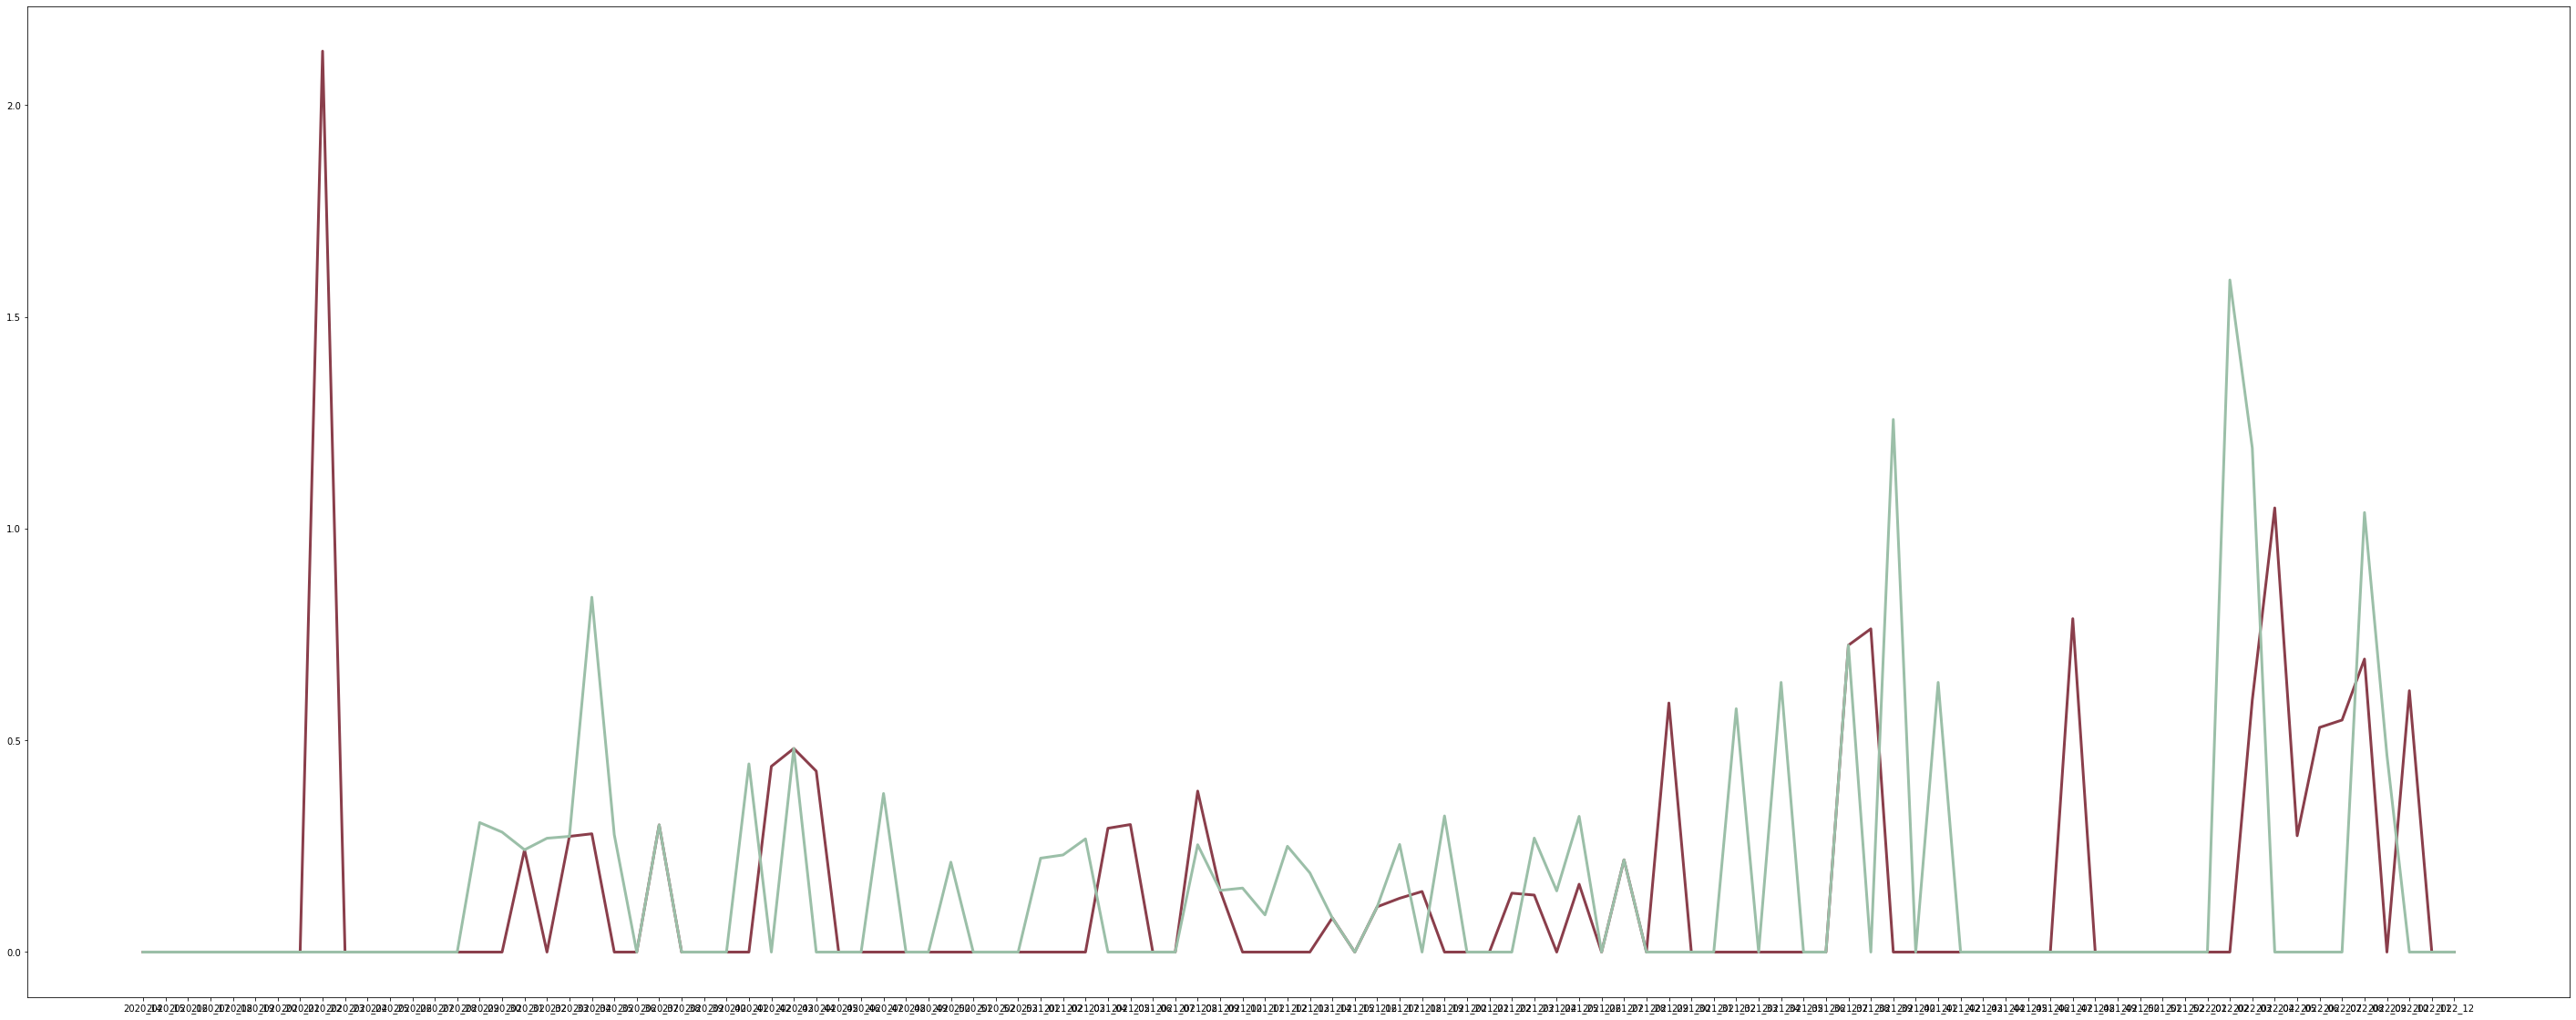

In [72]:
plt.figure(figsize=(50,20))
plt.plot(eixo_x,idade11,color='#8a3e4b',linewidth=3)
plt.plot(eixo_x,idade19,color='#9bbfa8',linewidth=3)

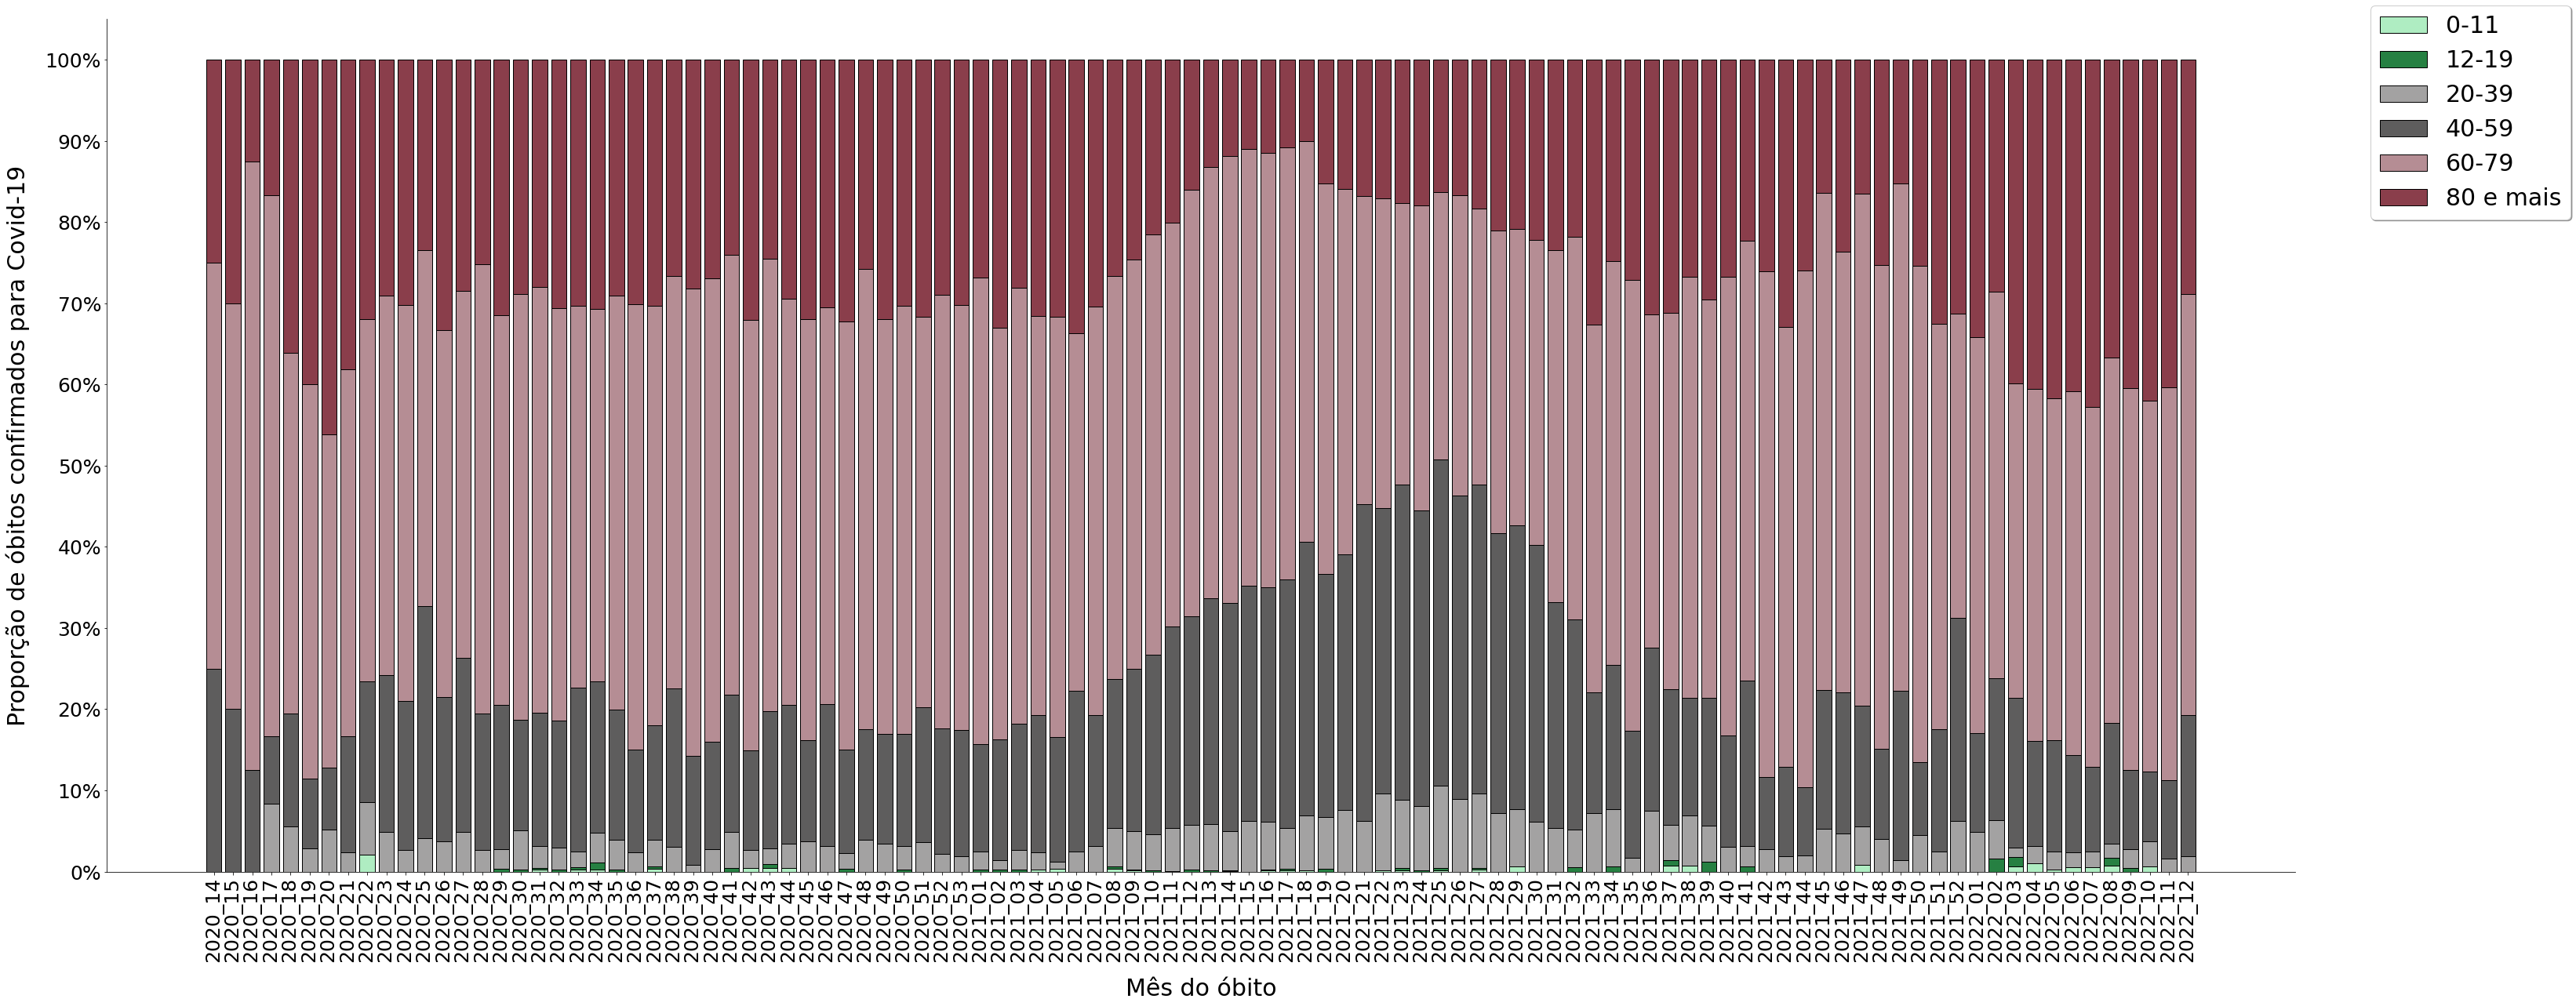

In [46]:
plt.figure(figsize=(50,20))
plt.bar(eixo_x,idade11, color='#afedc2',edgecolor='#000000')
plt.bar(eixo_x,idade19, bottom=idade11, color="#268042",edgecolor='#000000')
plt.bar(eixo_x,idade39, bottom=idade11 + idade19, color='#a3a2a2',edgecolor='#000000')
plt.bar(eixo_x,idade59, bottom=idade11 + idade19 + idade39, color='#5e5d5d',edgecolor='#000000')
plt.bar(eixo_x,idade79, bottom=idade11 + idade19 + idade39 + idade59, color='#b58d94',edgecolor='#000000')
plt.bar(eixo_x,idade80, bottom=idade11 + idade19 + idade39 + idade59 + idade79, color='#8a3e4b',edgecolor='#000000')
sns.despine()
plt.xticks(rotation=90,fontsize=25)
plt.xlabel('Mês do óbito',fontsize=30,labelpad=20)
plt.yticks(np.arange(0,110,10),fontsize=25)
plt.ylabel('Proporção de óbitos confirmados para Covid-19',fontsize=30,labelpad=20)
plt.gca().set_yticklabels(['{:.0f}%'.format(x*1) for x in plt.gca().get_yticks()])
plt.legend(legenda,loc='upper center',fancybox=True,bbox_to_anchor=(1.08,1.03),fontsize=30,shadow=True)
#plt.savefig(f'Z:/Graficos Boletim_Python/{ultima_pasta}/Slide11.png',dpi=720,bbox_inches='tight')